In [17]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng(2021)
from sklearn.metrics import ConfusionMatrixDisplay
import torch

In [18]:
dictionary = torch.load('data.pt')
train_images = (dictionary['train_images'] >= 0.5).float()
train_labels = 2 * dictionary['train_labels'] - 1
test_images = (dictionary['test_images'] >= 0.5).float()
test_labels = 2 * dictionary['test_labels'] - 1

In [19]:
def perceptron(X, Y, w, max_iter, eta=0.01):
    X = Y * X
    convergence = False
    iter = 0

    while not convergence and iter < max_iter:
        incorrect = X @ w < 0
        w += eta * X[incorrect].sum(axis=0)

        convergence = not incorrect.any()
        iter += 1

    incorrect = X @ w < 0
    return convergence, incorrect.sum() / X.shape[0], iter

In [20]:
w = rng.normal(size=train_images.shape[1])

In [21]:
results = perceptron(train_images.numpy(), train_labels[:, None].numpy(), w, 1000)
print('(converged, error, iterations):', results)

(converged, error, iterations): (False, 0.01250403355921265, 1000)


In [22]:
print('Train classification error:', ((train_labels[:, None] * train_images @ w) < 0).float().mean().item())
print('Test classification error:', ((test_labels[:, None] * test_images @ w) < 0).float().mean().item())

Train classification error: 0.012504033744335175
Test classification error: 0.02453385666012764


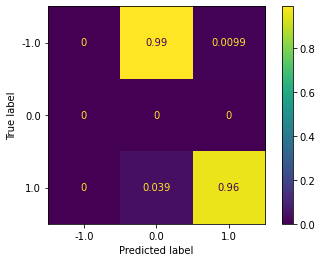

In [23]:
ConfusionMatrixDisplay.from_predictions(
    test_labels, test_images @ w >= 0, normalize='true',
)

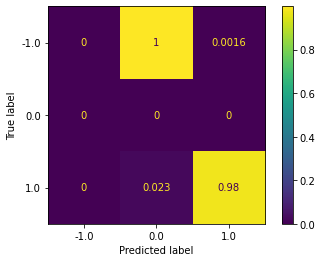

In [24]:
ConfusionMatrixDisplay.from_predictions(
    train_labels, train_images @ w >= 0, normalize='true',
)

In [36]:
w.argmin()

124

In [35]:
def weights_to_literals(w, precision=8):
    w_normalized = w / np.abs(w).max()
    w_quantized = (w_normalized * (2 ** precision - 1)).astype(int)
    w_literals = map(lambda w: f'9\'d{(-np.sign(w) + 1) * 2 ** (precision - 1) + np.abs(w)}', w_quantized)
    w_bits = list(w_literals)[::-1]
    
    return ','.join(w_bits)

weights_to_literals(w)

"9'd3,9'd14,9'd3,9'd1,9'd12,9'd271,9'd8,9'd9,9'd5,9'd1,9'd8,9'd15,9'd44,9'd24,9'd23,9'd12,9'd128,9'd25,9'd11,9'd265,9'd5,9'd128,9'd128,9'd261,9'd8,9'd6,9'd128,9'd17,9'd6,9'd9,9'd4,9'd1,9'd10,9'd128,9'd7,9'd3,9'd25,9'd9,9'd272,9'd266,9'd266,9'd55,9'd37,9'd18,9'd17,9'd21,9'd8,9'd25,9'd285,9'd313,9'd3,9'd265,9'd258,9'd267,9'd257,9'd1,9'd3,9'd128,9'd264,9'd3,9'd1,9'd10,9'd68,9'd28,9'd298,9'd258,9'd55,9'd316,9'd35,9'd310,9'd375,9'd407,9'd38,9'd300,9'd294,9'd331,9'd267,9'd382,9'd35,9'd71,9'd261,9'd6,9'd262,9'd257,9'd3,9'd260,9'd258,9'd128,9'd282,9'd270,9'd279,9'd277,9'd25,9'd68,9'd30,9'd34,9'd306,9'd39,9'd91,9'd372,9'd328,9'd339,9'd329,9'd81,9'd128,9'd303,9'd19,9'd326,9'd285,9'd268,9'd261,9'd3,9'd260,9'd128,9'd265,9'd269,9'd299,9'd294,9'd318,9'd267,9'd318,9'd299,9'd315,9'd16,9'd311,9'd294,9'd263,9'd257,9'd364,9'd302,9'd285,9'd389,9'd36,9'd31,9'd308,9'd295,9'd342,9'd4,9'd257,9'd9,9'd1,9'd4,9'd128,9'd11,9'd289,9'd365,9'd363,9'd365,9'd299,9'd343,9'd379,9'd359,9'd31,9'd285,9'd27,9'd42,9'd385,9'd